**Кратий план работы:**

**Исследовательский анализ стартапа, продающего продукты питания:**

1. Открыть файл и посмотреть информацию, посмотреть наличие пропусков и дубликатов, зафиксировать начальные данные.
2. Заменить названия столбоцов, обработать пропуски, преобразовать типы столбцов, добавить столбец с датой и временем.
3. Изучить и проверить данные
   - Сколько всего событий в логе
   - Сколько всего пользователей в логе
   - Изучить данные за определенный период
4. Произвести исследовательский анализ воронки событий.
5. Изучить результаты эксперимента
   - Посчитать статистическую значимость, сделать выводы и предположения.
6. Написать промежуточные и общий вывод.
10. **Цель исследования:** По результатам исследования разобраться, как ведут себя пользователи мобильного приложения после изменения шрифта.
11. Метрики для А/B тестирования:
- изменение конверсии - изменилась ли конверсия перехода по воронкам в результате А/B теста

# Шаг №1 Изучение общей информации

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import datetime as dt
from plotly import graph_objects as go
import math as mth

In [2]:
#open file
try:
    logs = pd.read_csv('/datasets/logs_exp.csv')
except:
    url = 'https://drive.google.com/file/d/1du0UVewtVxnDtaIbNqAq2_2DEYcm605J/view?usp=drive_link'
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    logs = pd.read_csv(path, sep='\t')

In [3]:
# Функция для просмотра информации о DataFrame
def info_data_frame (x):
    return  display(
        print('------Информация о DataFrame------\n'),
        x.info(),
        '-'* 25,           
        'Вывод первых 5 строчек:', x.head(),           
        f'Число строк : {x.shape[0]}',
        '-'* 25,
        f'Число столбцов : {x.shape[1]}',
        '-'* 25,
        f'Количество дубликатов = {x.duplicated().sum()}',
        '-'* 25,
        'Пропущенные значения:',  x.isna().sum(),
        '-'* 25,            
        'Процент пропусков от всего DataFrame:',
         (x.isna().mean().sort_values(ascending=False)*100).astype(str) + '%'
        )   

In [4]:
info_data_frame(logs)

------Информация о DataFrame------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

None

'-------------------------'

'Вывод первых 5 строчек:'

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


'Число строк : 244126'

'-------------------------'

'Число столбцов : 4'

'-------------------------'

'Количество дубликатов = 413'

'-------------------------'

'Пропущенные значения:'

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

'-------------------------'

'Процент пропусков от всего DataFrame:'

EventName         0.0%
DeviceIDHash      0.0%
EventTimestamp    0.0%
ExpId             0.0%
dtype: object

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Вывод по разделу:** 

**1.** Открыт DataFrame **`logs`** - всего 4 столбца и 244126 строк, имеются дубликаты - 413, пропуски не обнаружены, столбцы нужно привести к нижнему регистру, добавить столбец с датой.
</div>

# Шаг №2 Подготовка данных

In [5]:
# Приведение названия столбцов к нижнему регистру
logs.columns =  logs.columns.str.lower().str.replace(' ', '_')

In [6]:
logs = logs.rename(columns={'eventname': 'event_name', 
                            'deviceidhash': 'user_id',
                            'eventtimestamp': 'event_time',
                            'expid': 'experiment_number'})

In [7]:
logs.head()

,event_name,user_id,event_time,experiment_number
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [8]:
logs = logs.drop_duplicates().reset_index(drop=True) #Удаление дубликатов

In [9]:
logs.duplicated().sum() #Проверка на дубликаты

0

In [10]:
#Добавлен столбец с датой и временем
logs['date_time'] =  pd.to_datetime(logs['event_time'], unit="s")

In [11]:
#Добавлен столбец с датой
logs['date'] = logs['date_time'].dt.date

In [12]:
logs.head()

,event_name,user_id,event_time,experiment_number,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [13]:
experiment_number_246 = logs.query('experiment_number == 246')['user_id'].unique()
experiment_number_247 = logs.query('experiment_number == 247')['user_id'].unique()
experiment_number_248 = logs.query('experiment_number == 248')['user_id'].unique()

In [14]:
intersections = []

In [15]:
#Функция для проверки пересечения пользователей
def intersections_user_id (x, y):
    for i in x:
        if i in y:
            intersections.append(i)
    display(f"Количество пересекающихся пользователей в группах: {len(intersections)}")        

In [16]:
#Группа 246 и 247
intersections_user_id (experiment_number_246, experiment_number_247)

'Количество пересекающихся пользователей в группах: 0'

In [17]:
#Группа 246 и 248
intersections_user_id (experiment_number_246, experiment_number_248)

'Количество пересекающихся пользователей в группах: 0'

In [18]:
#Группа 247 и 248
intersections_user_id (experiment_number_247, experiment_number_248)

'Количество пересекающихся пользователей в группах: 0'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Вывод по разделу:** 

**1.** DataFrame приведен к нижнему регистру.

**2.** Заменены названия столбцов - `event_name, user_id, event_time, experiment_number`.

**3.** Удалены дубликаты.

**4.** Добавлены 2 столбца с датой и временем `date_time` и отдельный с датой `date`.

**5.** Пересечения пользователей в группах не обнаружено.
</div>

# Шаг №3 Изучение и проверка данных

In [19]:
logs.head()

,event_name,user_id,event_time,experiment_number,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [20]:
display(f"Всего событий в логе: {len(logs.event_time)}")

'Всего событий в логе: 243713'

In [21]:
display(f"Всего пользователей в логе: {logs.user_id.nunique()}")

'Всего пользователей в логе: 7551'

In [22]:
df = logs.pivot_table(index = 'user_id', values = 'event_time', aggfunc='count')

In [23]:
df.describe().astype(int)

,event_time
count,7551
mean,32
std,65
min,1
25%,9
50%,20
75%,37
max,2307


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
В среднем на 1 пользователя приходится `32` события, медианное значение - `20` событий
    
</div>

In [24]:
print(f"Максимальная дата: {logs.date_time.max()}")
print(f"Минимальная дата: {logs.date_time.min()}")
delta = (logs.date_time.max() - logs.date_time.min()).days

Максимальная дата: 2019-08-07 21:15:17
Минимальная дата: 2019-07-25 04:43:36


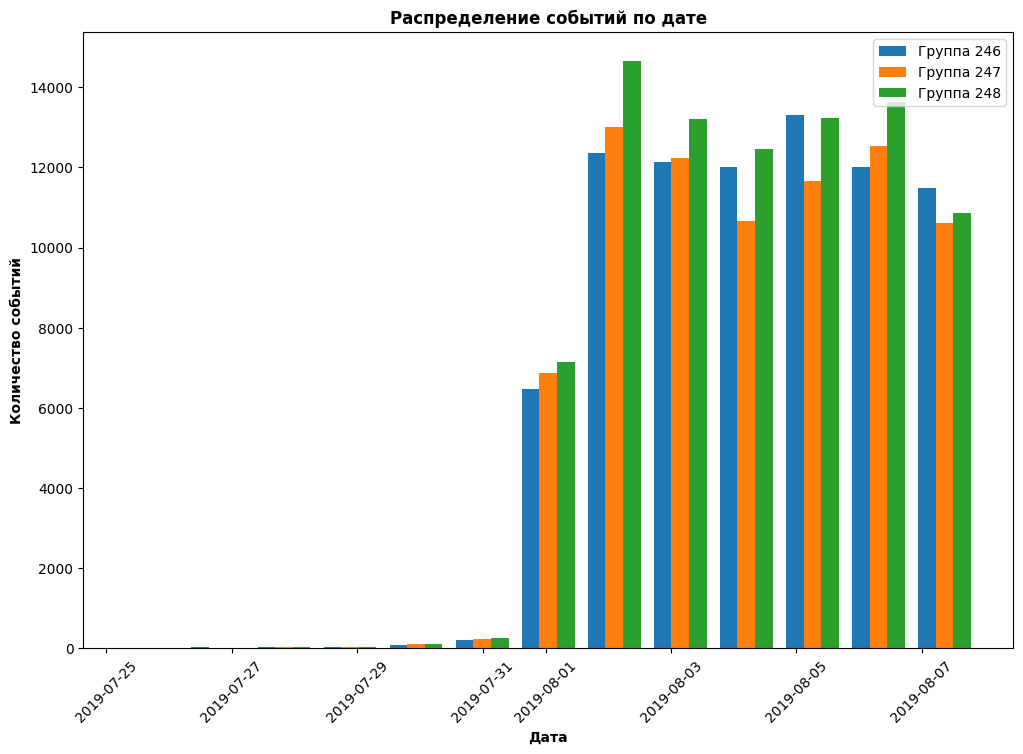

In [25]:
plt.figure(figsize=(12,8))
plt.hist([logs[logs['experiment_number']==246]['date_time'], 
          logs[logs['experiment_number']==247]['date_time'], 
          logs[logs['experiment_number']==248]['date_time']], \
         bins=delta, label=['Группа 246', 'Группа 247', 'Группа 248'])
plt.legend(loc='upper right')
plt.title('Распределение событий по дате', fontsize=12, fontweight="bold")
plt.ylabel('Количество событий', fontsize=10, fontweight="bold")
plt.xlabel('Дата', fontsize=10, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
- Количество событий резко увеличилось с 1 августа 2019 года.
- Данные до 1 августа можно отбросить, так как они непрезентативны.
- Возможно было какое то рекламное событие, может была внедрена новая функция или приложение было обновлено.
    
</div>

In [26]:
logs_news = logs.query("date_time >= '2019-08-01'")

In [27]:
info_data_frame(logs_news)

------Информация о DataFrame------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2826 to 243712
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   event_name         240887 non-null  object        
 1   user_id            240887 non-null  int64         
 2   event_time         240887 non-null  int64         
 3   experiment_number  240887 non-null  int64         
 4   date_time          240887 non-null  datetime64[ns]
 5   date               240887 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 12.9+ MB


None

None

'-------------------------'

'Вывод первых 5 строчек:'

,event_name,user_id,event_time,experiment_number,date_time,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


'Число строк : 240887'

'-------------------------'

'Число столбцов : 6'

'-------------------------'

'Количество дубликатов = 0'

'-------------------------'

'Пропущенные значения:'

event_name           0
user_id              0
event_time           0
experiment_number    0
date_time            0
date                 0
dtype: int64

'-------------------------'

'Процент пропусков от всего DataFrame:'

event_name           0.0%
user_id              0.0%
event_time           0.0%
experiment_number    0.0%
date_time            0.0%
date                 0.0%
dtype: object

In [28]:
display(f"Потеряно событий при фильтрации данных по дате: {len(logs.event_time) - len(logs_news.event_time)}")
display(f"Доля потерянных событий {(len(logs.event_time) - len(logs_news.event_time)) / len(logs.event_time):.1%}")
display(f"Потеряно пользователей при фильтрации данных по дате: {logs.user_id.nunique() - logs_news.user_id.nunique()}")
display(f"Доля потерянных пользователе {(logs.user_id.nunique() - logs_news.user_id.nunique())/logs.user_id.nunique() :.1%}")

'Потеряно событий при фильтрации данных по дате: 2826'

'Доля потерянных событий 1.2%'

'Потеряно пользователей при фильтрации данных по дате: 17'

'Доля потерянных пользователе 0.2%'

In [29]:
print('Количество пользователей по группам')
logs_news.pivot_table(index = 'experiment_number', values = 'user_id', aggfunc = 'count').T

Количество пользователей по группам


experiment_number,246,247,248
user_id,79302,77022,84563


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Вывод по разделу:** 

**1.** Всего событий в логе: `243713`, всего пользователей в логе - `7551`, в среднем приходится 32 события на одного пользователя, медианное значение - 20 событий.

**2.** Построена гистограмма на которой виден скачок событий `1 августа 2019 года`, данные до данной даты были отброшены, так как они непрезентативны.

**3.** После фильтрации было потеряно `2826 событий, 17 пользователей`.

**4.** Проверено, что есть пользователи во всех 3х группах: `246 группа - 79302, 247 - 77022, 248 - 84563`.
</div>

# Шаг 4. Изучение воронки событий

## Просмотр событий в логе

In [30]:
#Наименования событий
set(logs_news.event_name.unique())

{'CartScreenAppear',
 'MainScreenAppear',
 'OffersScreenAppear',
 'PaymentScreenSuccessful',
 'Tutorial'}

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
       
- `CartScreenAppear` - просмотр корзины
- `MainScreenAppear` - просмотр главной страницы встречается.
- `OffersScreenAppear` - просмотр страницы с предложениями
- `PaymentScreenSuccessful` - просмотр экрана с платежами
- `Tutorial` - просмотр обучающей информации.
    
</div>

In [31]:
logs_news.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'count') \
    .sort_values(by = 'user_id', ascending = False)

,user_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
Как видно из данных, наиболее перспективные гипотезы:
    
- Самое частое событие - `MainScreenAppear` - просмотр главной страницы встречается 117328 раз.
- Самое редкое событие - `Tutorial` - просмотр обучающей информации встречается 1005 раз.
    
</div>

## Сколько пользователей совершали каждое из этих событий

In [32]:
table = pd.pivot_table(logs_news, values='user_id', index='event_name',
                       aggfunc={'user_id': "nunique"}) \
    .sort_values(by = 'user_id', ascending = False)

In [33]:
table.reset_index(inplace=True)

In [34]:
#Доля пользователей совершивших каждое из этих событий
table['ratio'] = ((table['user_id'] / logs_news['user_id'].nunique()) * 100) \
    .round(2)

In [35]:
table.head()

,event_name,user_id,ratio
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


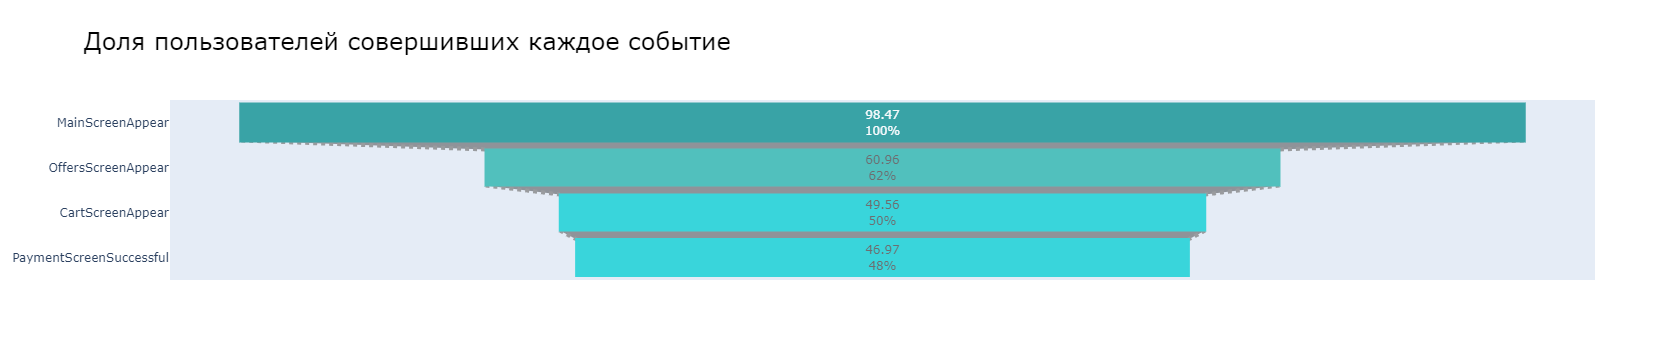

In [36]:
#Обучение отбрасываем
table = table.query("event_name	!= 'Tutorial'")
#Построение диаграммы воронки
fig = go.Figure(go.Funnel(
    y = table['event_name'],
    x = table['ratio'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.75, marker = {"color": ["#008B8B", "#20B2AA", "#00CED1", "#00CED1", "#B0E0E6"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#008B8B", "#20B2AA", "#00CED1", "#00CED1", "#B0E0E6"]}},
    connector = {"line": {"color": "#808080", "dash": "dot", "width": 4}})
    )
fig.update_layout(title=dict(text='Доля пользователей совершивших каждое событие', 
                             font=dict(size=24, color='black')))
fig.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Доля пользователей, совершивших событие и последовательность событий:**
    
- 98% пользователей проходят - **`MainScreenAppear`** - просмотр главной страницы встречается.
- 61% пользователей проходят - **`OffersScreenAppear`** - просматривают страницу с предложениями.
- 50% пользователей проходят - **`CartScreenAppear`** - доходят до страницы с корзиной.
- 50% пользователей проходят - **`PaymentScreenSuccessful`** - доходят до страницы с платежами.
- 11% пользователей проходят - **`Tutorial`** - обучение.
- События происходят в таком же порядке, кроме `Tutorial`, который в эту цепочку не входит.
</div>

## Доля пользователей, проходящих на следующий этап воронки

In [37]:
#Методом shift сдвигаем значения вниз
table['step'] = table['user_id'].shift(1) 

In [38]:
#Расчёт конверсии
table['conversion'] = (table['user_id'] / table['step']*100).round(2)

In [39]:
#Удаление столбца со сдвигом, после расчётов он не нужен
table.drop(columns= ['step'], axis = 1, inplace = True)

In [40]:
table.head()

,event_name,user_id,ratio,conversion
0,MainScreenAppear,7419,98.47,NaN
1,OffersScreenAppear,4593,60.96,61.91
2,CartScreenAppear,3734,49.56,81.30
3,PaymentScreenSuccessful,3539,46.97,94.78


In [41]:
#Заменяем пропуск на 100, так как все пользователи проходят данный этап
table.conversion = table.conversion.fillna(100)

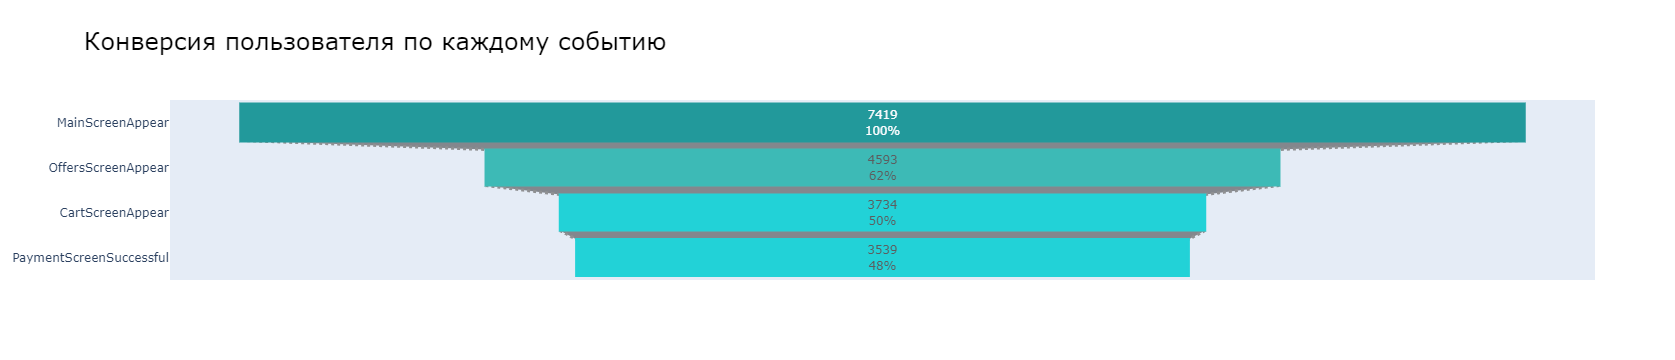

In [42]:
#Строим диаграмму воронки
fig = go.Figure(go.Funnel(
    y = table['event_name'],
    x = table['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.85, marker = {"color": ["#008B8B", "#20B2AA", "#00CED1", "#00CED1", "#B0E0E6"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#008B8B", "#20B2AA", "#00CED1", "#00CED1", "#B0E0E6"]}},
    connector = {"line": {"color": "#808080", "dash": "dot", "width": 3}})
    )
fig.update_layout(title=dict(text='Конверсия пользователя по каждому событию', 
                             font=dict(size=24, color='black')))
fig.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Доля пользователей, прошедших по каждому этапу воронки:**
    
- 62% пользователей проходят - с главной страницы **`MainScreenAppear`** на страницу с предложениями **`OffersScreenAppear`**.
- 81% пользователей проходят - со страницы с предложениями **`OffersScreenAppear`**  на страницу с корзиной **`CartScreenAppear`**.
- 95% пользователей проходят из корзины **`CartScreenAppear`**  на страницу с оплатой **`PaymentScreenSuccessful`**.
- Больше всего пользователей теряется при переходе с главной страницы на страницу с предложениями.
- Пользователи могут переходить по прямым ссылкам, минуя главный экран, это объясняет почему 1.5% пользователей миновали данное событие.
</div>

## Доля пользователей, дошедших от первого события до оплаты

In [43]:
table.head()

,event_name,user_id,ratio,conversion
0,MainScreenAppear,7419,98.47,100.00
1,OffersScreenAppear,4593,60.96,61.91
2,CartScreenAppear,3734,49.56,81.30
3,PaymentScreenSuccessful,3539,46.97,94.78


In [44]:
display(f"Доля пользователей прошедших от первого этапа до оплаты: {((table['user_id'][3] / table['user_id'][0])*100).round(2).astype(str) + '%'}")

'Доля пользователей прошедших от первого этапа до оплаты: 47.7%'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Вывод по разделу:**

**1**. Просмотрены события:
- **`CartScreenAppear`** - просмотр корзины встречается `42303` раз.
- **`MainScreenAppear`** - просмотр главной страницы встречается - `117328` раз.
- **`OffersScreenAppear`** - просмотр страницы с предложениями встречается `46333` раз.
- **`PaymentScreenSuccessful`** - просмотр экрана с платежами встречается `33918` раз.
- **`Tutorial`** - просмотр обучающей информации встречается `1005` раз.
    
**2**. Посчитано количество пользователей, совершивших каждое событие:
- 98% пользователей проходят - **`MainScreenAppear`** - просмотр главной страницы встречается.
- 61% пользователей проходят - **`OffersScreenAppear`** - просматривают страницу с предложениями.
- 50% пользователей проходят - **`CartScreenAppear`** - доходят до страницы с корзиной.
- 50% пользователей проходят - **`PaymentScreenSuccessful`** - доходят до страницы с платежами.
- 11% пользователей проходят - **`Tutorial`** - обучение.
- События происходят в таком же порядке, кроме `Tutorial`, который в эту цепочку не входит.
    
**3**. Посчитано доля пользователей прошедших следующий этап воронки (от числа пользователей на предыдущем)
- 62% пользователей проходят - с главной страницы **`MainScreenAppear`** на страницу с предложениями **`OffersScreenAppear`**.
- 81% пользователей проходят - со страницы с предложениями **`OffersScreenAppear`**  на страницу с корзиной **`CartScreenAppear`**.
- 95% пользователей проходят из корзины **`CartScreenAppear`**  на страницу с оплатой **`PaymentScreenSuccessful`**.
    
**4**. Больше всего пользователей теряется при переходе с главной страницы на страницу с предложениями, **причинами могут быть**:
- Медленная загрузка страницы с предложениями.
- Некорректно настроенные редиректы.
- Наличие ботов среди посетителей
- Проблемы с доменом (например, истёк срок регистрации)
     
**5**. Доля пользователей прошедших от первого этапа до оплаты: 47.7%
</div>

# Шаг 5. Изучение результатов эксперимента

In [45]:
logs_news.head()

,event_name,user_id,event_time,experiment_number,date_time,date
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [46]:
#Количество пользователей в каждой группе
logs_news.pivot_table(index = 'experiment_number', values = 'user_id', aggfunc = 'nunique')

,user_id
experiment_number,
246,2484
247,2513
248,2537


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
- В 246 группе - 2484 пользователя
- в 247 группе - 2513 пользователя
- в 248 группе - 2537 пользователя
</div>

## Проверка статистического критерия между группами 246 и 247

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Критерии успешного A/A-теста:**
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста.
</div>

In [47]:
#Различие между группами
difference_between_groups = (((logs_news.query("experiment_number == 247")['user_id'].nunique() - logs_news.query("experiment_number == 246")['user_id'].nunique()) 
       / logs_news.query("experiment_number == 246")['user_id'].nunique()))

In [48]:
print("Количество пользователей между группами различается на {0:.1%}".format(difference_between_groups))

Количество пользователей между группами различается на 1.2%


## Доля пользователей, совершавших каждое событие

In [49]:
logs_246 = logs_news.query("experiment_number == 246")
logs_247 = logs_news.query("experiment_number == 247")
logs_248 = logs_news.query("experiment_number == 248")
logs_A_A = logs_news.query("experiment_number != 248")

In [50]:
#Доля пользователей из 246 группы совершивших каждое событие
logs_246_event = logs_246.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique') \
    .sort_values(by = 'user_id', ascending = False)
logs_246_event.reset_index(inplace=True)
logs_246_event = logs_246_event.query("event_name != 'Tutorial'")
logs_246_event.head()

,event_name,user_id
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [51]:
logs_247_event = logs_247.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique') \
    .sort_values(by = 'user_id', ascending = False)
logs_247_event.reset_index(inplace=True)
logs_247_event = logs_247_event.query("event_name != 'Tutorial'")
logs_247_event.head()

,event_name,user_id
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


In [52]:
logs_248_event = logs_248.pivot_table(index = 'event_name', values = 'user_id', aggfunc = 'nunique') \
    .sort_values(by = 'user_id', ascending = False)
logs_248_event.reset_index(inplace=True)
logs_248_event = logs_248_event.query("event_name != 'Tutorial'")
logs_248_event.head()

,event_name,user_id
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


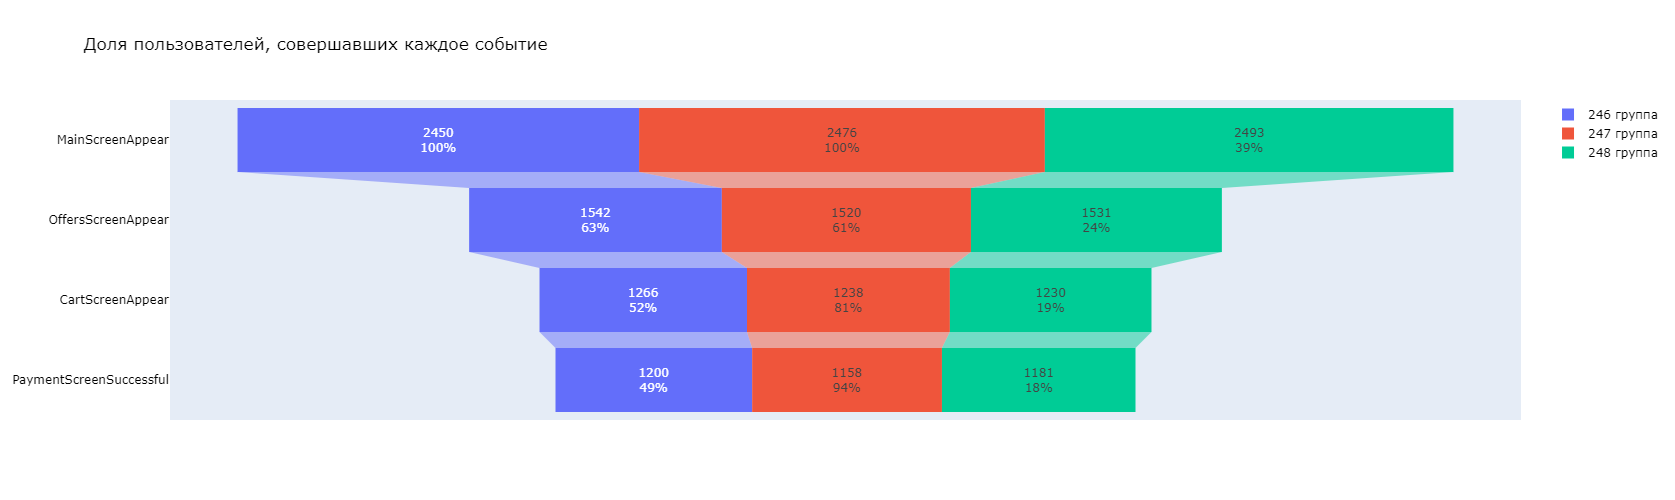

In [53]:
#Доля пользователей, совершавших событие
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = '246 группа',
    y = logs_246_event['event_name'],
        x = logs_246_event['user_id'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = '247 группа',
    orientation = "h",
    y = logs_247_event['event_name'],
        x = logs_247_event['user_id'],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = '248 группа',
    orientation = "h",
    y = logs_248_event['event_name'],
        x = logs_248_event['user_id'],
    textposition = "inside",
    textinfo = "value+percent total"))

#Название и ширина
fig.update_layout(width=850, 
                  height=500, 
                  title_text="Доля пользователей, совершавших каждое событие",
                 font=dict(size=12, color='black'))
fig.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
**Гипотезы:**
- Статистическая значимость - 0.05
- **Н0 - Статистических различий между группами в конверсии нет**.
- **Н1 - Статистические различия между группами в конверсии есть**.
- Для проверки гипотезы будет использоваться Z- тест на равенство долей
</div>

In [54]:
#статистическая значимость
alpha = 0.05

In [55]:
logs_246_event_name = logs_246[logs_246['event_name'] == 'MainScreenAppear']['user_id'].nunique()
logs_247_event_name = logs_247[logs_247['event_name'] == 'MainScreenAppear']['user_id'].nunique()
logs_248_event_name = logs_248[logs_248['event_name'] == 'MainScreenAppear']['user_id'].nunique()

In [56]:
#Количество пользователей в группах совершивших событие
users_event_246_247 = np.array([logs_246_event_name, logs_247_event_name])

In [57]:
print(users_event_246_247)

[2450 2476]


In [58]:
#количество уникальных пользователей в группах
un_users_246_247 = np.array([logs_246['user_id'].nunique(), logs_247['user_id'].nunique()])

In [59]:
print(un_users_246_247)

[2484 2513]


In [60]:
#Доля группы 246 перешедших первый этап
p1 = users_event_246_247[0] / un_users_246_247[0]
print(f"Доля группы 246 перешедших первый этап: {p1.round(3)}")
#Доля группы 247 перешедших первый этап
p2 = users_event_246_247[1] / un_users_246_247[1]
print(f"Доля группы 247 перешедших первый этап: {p2.round(3)}")

Доля группы 246 перешедших первый этап: 0.986
Доля группы 247 перешедших первый этап: 0.985


In [61]:
# пропорция успехов в комбинированном датасете:
p_combined = (users_event_246_247[0] + users_event_246_247[1]) / (un_users_246_247[0] + un_users_246_247[1])
print(f"Комбинированный датасет: {p_combined.round(3)}")

Комбинированный датасет: 0.986


In [62]:
# разница пропорций в датасетах
difference = p1 - p2
print(f"Разница пропорций в датасетах: {difference.round(3)}")

Разница пропорций в датасетах: 0.001


In [63]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users_event_246_247[0] + 1/un_users_246_247[1]))

In [64]:
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [65]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [66]:
print('p-значение: ', p_value)

p-значение:  0.7578766335867129


In [67]:
if p_value < alpha:
    display('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    display('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
p_value < alpha статистических различий между группами нет.
</div>

In [68]:
#Уникальные названия событий
un_event_name = logs_news['event_name'].unique()

In [69]:
print(un_event_name)

['Tutorial' 'MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']


In [70]:
#Функция для проверки z-теста
def func (x, y, un_event_name):
    
    print("Проверка статистической значимости для события:", un_event_name)
    
    #статистическая значимость
    alpha = 0.05
    
    #Количество пользователей в группах совершивших событие
    users_event = np.array([x[x['event_name'] == un_event_name]['user_id'].nunique(), y[y['event_name'] == un_event_name]['user_id'].nunique()])
    
    #количество уникальных пользователей в группах
    un_users = np.array([x['user_id'].nunique(), y['user_id'].nunique()])
    
    #Доля группы перешедших первый этап
    p1 = users_event[0] / un_users[0]
    
    #Доля группы перешедших первый этап
    p2 = users_event[1] / un_users[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (users_event[0] + users_event[1]) / (un_users[0] + un_users[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/un_users[0] + 1/un_users[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)
    
    if p_value < alpha:
        display('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
    print('-'* 25)

In [71]:
for i in un_event_name:
    func(logs_246, logs_247, i)

Проверка статистической значимости для события: Tutorial
p-значение:  0.9376996189257114


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: MainScreenAppear
p-значение:  0.7570597232046099


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: OffersScreenAppear
p-значение:  0.2480954578522181


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: CartScreenAppear
p-значение:  0.22883372237997213


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: PaymentScreenSuccessful
p-значение:  0.11456679313141849


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
- Для всех событий p_value меньше статистической значимости
- Группы А/A теста разбиты корректно
</div>

## Сравнение с тестовой группой B каждой группой

In [72]:
for i in un_event_name:
    func(logs_246, logs_248, i)

Проверка статистической значимости для события: Tutorial
p-значение:  0.8264294010087645


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: MainScreenAppear
p-значение:  0.2949721933554552


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: OffersScreenAppear
p-значение:  0.20836205402738917


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: CartScreenAppear
p-значение:  0.07842923237520116


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: PaymentScreenSuccessful
p-значение:  0.2122553275697796


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
- Между группами 246 и 248 отсутствует статистическая значимость
</div>

In [73]:
for i in un_event_name:
    func(logs_247, logs_248, i)

Проверка статистической значимости для события: Tutorial
p-значение:  0.765323922474501


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: MainScreenAppear
p-значение:  0.4587053616621515


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: OffersScreenAppear
p-значение:  0.9197817830592261


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: CartScreenAppear
p-значение:  0.5786197879539783


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: PaymentScreenSuccessful
p-значение:  0.7373415053803964


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------


In [74]:
for i in un_event_name:
    func(logs_A_A, logs_248, i)

Проверка статистической значимости для события: Tutorial
p-значение:  0.764862472531507


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: MainScreenAppear
p-значение:  0.29424526837179577


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: OffersScreenAppear
p-значение:  0.43425549655188256


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: CartScreenAppear
p-значение:  0.18175875284404386


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------
Проверка статистической значимости для события: PaymentScreenSuccessful
p-значение:  0.6004294282308704


'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

-------------------------


<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   
    
- Между группами контрольными группами 246/247 и тестовой 248 отсутствует статистическая значимость
- Отсутствует статистическая значимость между объединённой 246/247 и контрольной группой - 248    
- Из данных гипотез следует, что изменение шрифтов не повлияло на пользователей тестовой группы
- Был выбран критический уровень значимости 0.05, так как данный уровень позволяет достичь баланса между вероятностью ошибки первого рода и второго рода. Если поменять уровень значимости на 1% - 0.01 то результат не изменяется, статистической значимости в конверсии не наблюдается, при уровне значимости 10% - 0.1 результаты теста не изменяются.
</div>

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Вывод по разделу:**

**1**. Посчитано количество пользователей в каждой группе:
- В 246 группе - 2484 пользователя, в 247 группе - 2513 пользователя, в 248 - 2537 пользователя

**2**. Самым популярным событием является `MainScreenAppear`, 
- 246 группа - 2450 раз пользователи совершили данное событие
- 247 группа 2476 раз пользователи совершили данное событие
- 248 группа 2493 раз пользователи совершили данное событие
- посчитано количество пользователей совершивших другие события

**3**. Проверены 2 контрольные группы А/А эксперимента, в результате выяснено:
- Различие количества пользователей между контрольными группами - 1.2%
- статистических различий между группами в конверсии нет

**4**. Проверены контрольные группы с тестовой, а так же объединённая контрольная с тестовой, статистических различий между группами в конверсии нет, из этого следует, что изменение шрифтов не повлияло на пользователей тестовой группы.

**5**. Был выбран критический уровень значимости 0.05, так как данный уровень позволяет достичь баланса между вероятностью ошибки первого рода и второго рода. Если поменять уровень значимости на 1% - 0.01 то результат не изменяется, статистических различий между группами в конверсии нет, при уровне значимости 10% - 0.1 результаты теста не изменяются.
</div>

# Общий вывод

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">   

**Общий вывод:** 


**1.** Открыт DataFrame **`logs`** - всего 4 столбца и 244126 строк, имеются дубликаты - 413, пропуски не обнаружены, столбцы были приведены к нижнему регистру, добавлены столбцы `date_time` и `date`, пересечения пользователей в группах не обнаружено. 
    
**2.** Выяснено, что всего событий в логе: `243713`, всего пользователей в логе - `7551`, в среднем приходится 32 события на одного пользователя, медианное значение - 20 событий
- Построена гистограмма на которой виден скачок событий `1 августа 2019 года`, данные до данной даты были отброшены, так как они непрезентативны
- После фильтрации было потеряно `2826 событий, 17 пользователей`.
- Проверено, что есть пользователи во всех 3х группах:
    - 246 группа - 79302 пользователей
    - 247 группа - 77022 пользователей
    - 248 группа - 84563 пользователей.

**3.** Просмотрены события:
- **`CartScreenAppear`** - просмотр корзины встречается `42303` раз.
- **`MainScreenAppear`** - просмотр главной страницы встречается - `117328` раз.
- **`OffersScreenAppear`** - просмотр страницы с предложениями встречается `46333` раз.
- **`PaymentScreenSuccessful`** - просмотр экрана с платежами встречается `33918` раз.
- **`Tutorial`** - просмотр обучающей информации встречается `1005` раз.
  
**4.** Для каждого события посчитано количество пользователей, совершивших данное событие:
- 98% пользователей проходят - **`MainScreenAppear`** - просмотр главной страницы встречается.
- 61% пользователей проходят - **`OffersScreenAppear`** - просматривают страницу с предложениями.
- 50% пользователей проходят - **`CartScreenAppear`** - доходят до страницы с корзиной.
- 50% пользователей проходят - **`PaymentScreenSuccessful`** - доходят до страницы с платежами.
- 11% пользователей проходят - **`Tutorial`** - обучение.
- События происходят в таком же порядке, кроме `Tutorial`, который в эту цепочку не входит.

**5.** Посчитана доля пользователей прошедших следующий этап воронки (от числа пользователей на предыдущем):
- 62% пользователей проходят - с главной страницы **`MainScreenAppear`** на страницу с предложениями **`OffersScreenAppear`**.
- 81% пользователей проходят - со страницы с предложениями **`OffersScreenAppear`**  на страницу с корзиной **`CartScreenAppear`**.
- 95% пользователей проходят из корзины **`CartScreenAppear`**  на страницу с оплатой **`PaymentScreenSuccessful`**.

**6.** Больше всего пользователей теряется с главной страницы на страницу с предложениями, **причинами могут быть**:
- Медленная загрузка страницы с предложениями.
- Некорректно настроенные редиректы.
- Наличие ботов среди посетителей
- Проблемы с доменом (например, истёк срок регистрации)
- Доля пользователей прошедших от первого этапа до оплаты: 47.7%
  
**7.** Посчитано количество пользователей в каждой группе:
- в 246 группе - 2484 пользователя
- в 247 группе - 2513 пользователя
- в 248 группе - 2537 пользователя

**8.** Самым популярным событием является `MainScreenAppear`
- 246 группа - 2450 раз пользователи совершили данное событие
- 247 группа 2476 раз пользователи совершили данное событие
- 248 группа 2493 раз пользователи совершили данное событие
- посчитано количество пользователей совершивших другие события

**9.** Проверены 2 контрольные группы А/А эксперимента, в результате выяснено:
- Различие количества пользователей между контрольными группами - 1.2%
- Статистических различий между группами в конверсии нет

**10.** Проверены контрольные группы с тестовой, а так же объёдиненная контрольная группа с тестовой, статистических различий между группами в конверсии нет

**11.** Был выбран критический уровень значимости 0.05, так как данный уровень позволяет достичь баланса между вероятностью ошибки первого рода и второго рода. Если поменять уровень значимости на 1% - 0.01 то результат не изменяется, статистической значимости не наблюдается, при уровне значимости 10% - 0.1 результаты теста не изменяются.

**12.** **По результатам А/B теста выяснено, что изменение шрифтов не повлияло на пользователей тестовой группы, так статистическая значимость в конверсии не найдена, дизайнерам можно менять шрифты, так как пользователи не реагируют на данное изменение.**
</div>